In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('grain_size.csv')

In [3]:
df ## normalize data

,Sample,Medium sand and above %,Fine sand %,Very fine sand %,Coarse silt %,Medium silt %,Fine silt %,Very fine silt %,Clay %
0,B7-1,30.29,13.25,0.06,14.57,7.22,1.86,5.41,24.75
1,M-12,9.05,10.94,53.32,3.34,2.24,1.86,1.94,16.68
2,B8-3,29.09,9.58,9.54,7.85,7.85,5.70,3.70,19.80
3,B3-4,14.65,20.95,36.06,4.90,3.05,2.10,3.40,12.70
4,B1-1,6.41,6.00,39.21,3.20,3.00,3.85,3.80,31.45
5,B1-2,7.84,6.73,30.58,3.40,4.05,3.45,5.25,35.50
6,B1-3,5.73,4.72,41.21,3.45,4.65,5.70,4.35,28.95
7,B2-1,7.09,4.32,43.07,2.70,4.30,2.50,4.25,28.95
8,B3-3,10.28,12.20,54.33,3.10,4.45,8.00,1.60,2.90


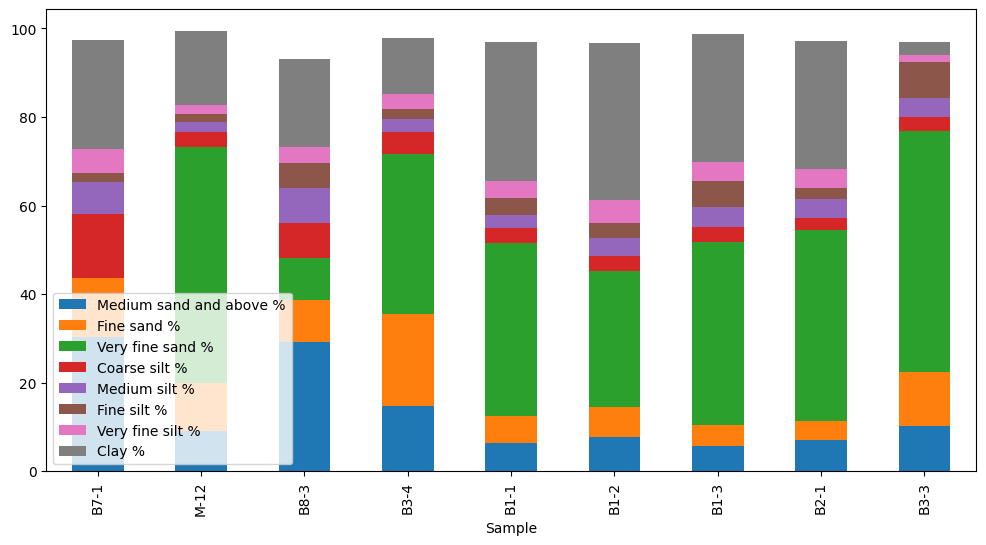

In [4]:
#create stacked bar chart
df.set_index('Sample').plot(kind='bar', stacked=True, figsize=(12,6))
plt.show()

In [5]:
# drop column with sample name
df = df.drop(columns=['Sample'])

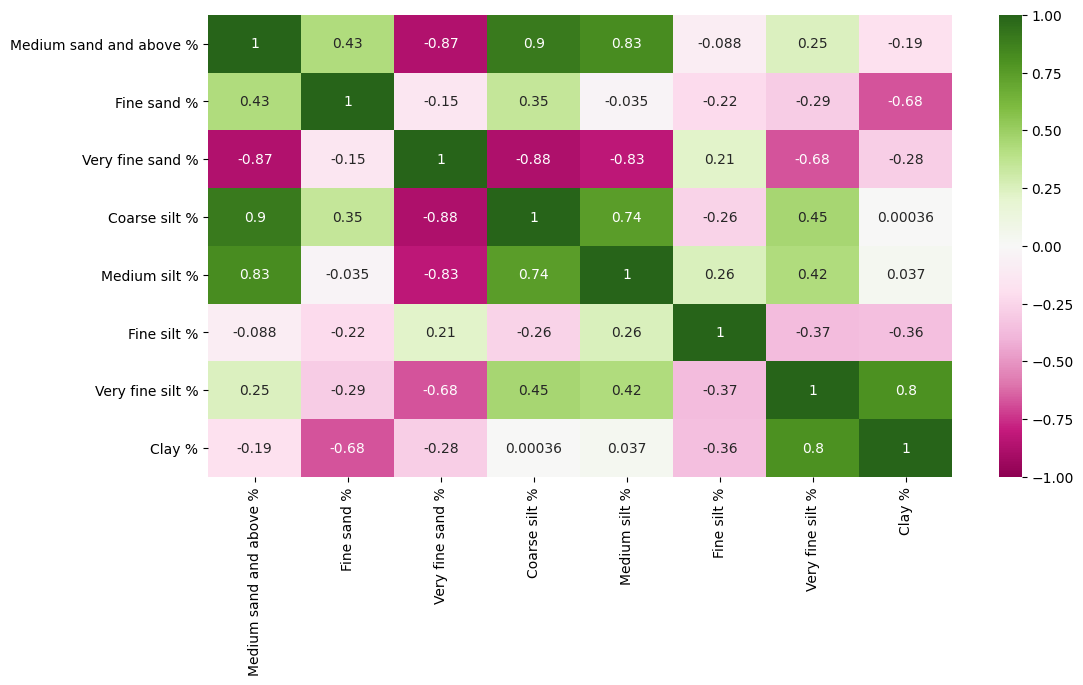

In [6]:
# correlation plot
plt.subplots(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='PiYG')
plt.show()

In [7]:
# list highly correlated features in descending order
corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr['pair_column'] = list(zip(corr.level_0, corr.level_1))
corr.set_index(['pair_column'], inplace=True)
corr.drop(columns=['level_0', 'level_1'], inplace=True)
corr.columns = ['correlation']
corr.drop_duplicates(inplace=True)
corr = corr[(corr.correlation < 1) & (corr.correlation >= 0.7)]
corr

,correlation
pair_column,
"(Medium sand and above %, Coarse silt %)",0.899446
"(Coarse silt %, Very fine sand %)",0.881445
"(Very fine sand %, Medium sand and above %)",0.869186
"(Medium sand and above %, Medium silt %)",0.827113
"(Very fine sand %, Medium silt %)",0.825691
"(Clay %, Very fine silt %)",0.803970
"(Medium silt %, Coarse silt %)",0.742314


### Generate new features from raw features

In [8]:
grain_sizes = ['Medium sand and above %', 'Fine sand %', 'Very fine sand %', 'Coarse silt %', 'Medium silt %', 'Fine silt %', 'Very fine silt %', 'Clay %']
sand = ['Medium sand and above %', 'Fine sand %', 'Very fine sand %']
silt = ['Coarse silt %', 'Medium silt %', 'Fine silt %', 'Very fine silt %']
clay =  ['Clay %']

df['sand_total %'] = df[sand].sum(axis=1)
df['silt_total %'] = df[silt].sum(axis=1)
df['sand/silt'] = df['sand_total %']/df['silt_total %']
df['sand/clay'] = df['sand_total %']/df['Clay %']
df['silt/clay'] = df['silt_total %']/df['Clay %']
df['mean'] = df[grain_sizes].mean(axis=1)
df['std'] = df[grain_sizes].std(axis=1)
df['median'] = df[grain_sizes].median(axis=1)
df['skewness'] = df[grain_sizes].skew(axis=1)
df['kurtosis'] = df[grain_sizes].kurt(axis=1)
df

,Medium sand and above %,Fine sand %,Very fine sand %,Coarse silt %,Medium silt %,Fine silt %,Very fine silt %,Clay %,sand_total %,silt_total %,sand/silt,sand/clay,silt/clay,mean,std,median,skewness,kurtosis
0,30.29,13.25,0.06,14.57,7.22,1.86,5.41,24.75,43.60,29.06,1.500344,1.761616,1.174141,12.17625,10.801225,10.235,0.701053,-0.661566
1,9.05,10.94,53.32,3.34,2.24,1.86,1.94,16.68,73.31,9.38,7.815565,4.395084,0.562350,12.42125,17.369627,6.195,2.337610,5.798956
2,29.09,9.58,9.54,7.85,7.85,5.70,3.70,19.80,48.21,25.10,1.920717,2.434848,1.267677,11.63875,8.508795,8.695,1.552722,1.827374
3,14.65,20.95,36.06,4.90,3.05,2.10,3.40,12.70,71.66,13.45,5.327881,5.642520,1.059055,12.22625,11.762966,8.800,1.325357,1.458380
4,6.41,6.00,39.21,3.20,3.00,3.85,3.80,31.45,51.62,13.85,3.727076,1.641335,0.440382,12.11500,14.530418,4.925,1.496321,0.513469
5,7.84,6.73,30.58,3.40,4.05,3.45,5.25,35.50,45.15,16.15,2.795666,1.271831,0.454930,12.10000,13.083754,5.990,1.423896,0.193460
6,5.73,4.72,41.21,3.45,4.65,5.70,4.35,28.95,51.66,18.15,2.846281,1.784456,0.626943,12.34500,14.428262,5.210,1.644487,1.360539
7,7.09,4.32,43.07,2.70,4.30,2.50,4.25,28.95,54.48,13.75,3.962182,1.881865,0.474957,12.14750,15.267409,4.310,1.658475,1.553871
8,10.28,12.20,54.33,3.10,4.45,8.00,1.60,2.90,76.81,17.15,4.478717,26.486207,5.913793,12.10750,17.476177,6.225,2.572117,6.890768


### Scale Data

In [9]:
transformer = StandardScaler()
df_scaled = pd.DataFrame(transformer.fit_transform(df), columns=df.columns)
df_scaled

,Medium sand and above %,Fine sand %,Very fine sand %,Coarse silt %,Medium silt %,Fine silt %,Very fine silt %,Clay %,sand_total %,silt_total %,sand/silt,sand/clay,silt/clay,mean,std,median,skewness,kurtosis
0,1.864645,0.682137,-1.963329,2.582208,1.513464,-1.001501,1.352853,0.239681,-1.132987,2.019452,-1.276879,-0.457828,-0.094779,0.165987,-1.030074,1.831088,-1.803743,-1.153365
1,-0.477618,0.218079,1.103749,-0.501977,-1.293051,-1.001501,-1.465666,-0.586518,1.308185,-1.370930,2.200328,-0.112749,-0.465697,1.351417,1.310397,-0.280500,1.358073,1.541044
2,1.732313,-0.055133,-1.417406,0.736640,1.868505,0.891928,-0.036100,-0.267096,-0.754199,1.337241,-1.045418,-0.369610,-0.038070,-2.434702,-1.846919,1.026176,-0.158324,-0.115334
3,0.139928,2.229000,0.109799,-0.073542,-0.836569,-0.883162,-0.279776,-0.993987,1.172610,-0.669769,0.830591,0.050710,-0.164554,0.407912,-0.687384,1.081056,-0.597592,-0.269226
4,-0.768746,-0.774324,0.291198,-0.540427,-0.864747,-0.020271,0.045125,0.925621,-0.474011,-0.600859,-0.050824,-0.473589,-0.539645,-0.130370,0.298722,-0.944291,-0.267291,-0.663308
5,-0.611052,-0.627674,-0.205777,-0.485499,-0.273012,-0.217503,1.222892,1.340256,-1.005629,-0.204625,-0.563665,-0.522007,-0.530824,-0.202948,-0.216757,-0.387647,-0.407215,-0.796770
6,-0.843734,-1.031465,0.406372,-0.471767,0.065122,0.891928,0.491864,0.669673,-0.470724,0.139926,-0.535796,-0.454835,-0.426536,0.982483,0.262322,-0.795330,0.018964,-0.310031
7,-0.693759,-1.111821,0.513483,-0.677746,-0.132123,-0.685930,0.410639,0.669673,-0.239014,-0.618086,0.078627,-0.442071,-0.518682,0.026881,0.561329,-1.265733,0.045989,-0.229401
8,-0.341978,0.471202,1.161912,-0.567890,-0.047589,2.026013,-1.741832,-1.997302,1.595768,-0.032350,0.363035,2.781981,2.778788,-0.166659,1.348363,-0.264820,1.811139,1.996392


### PCA

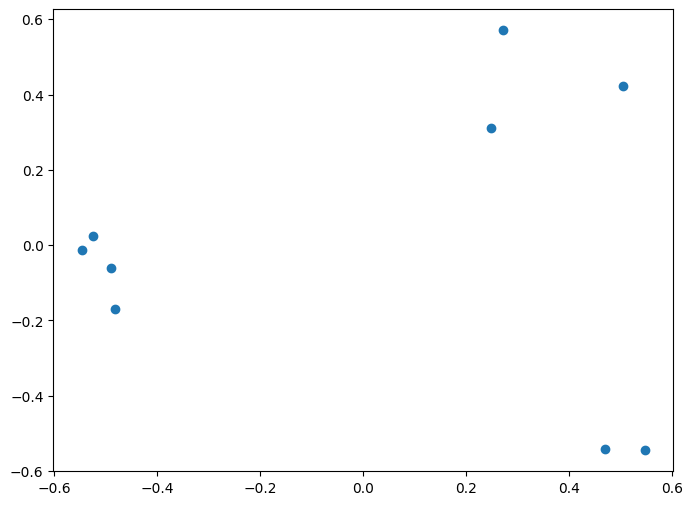

In [10]:
transformer = KernelPCA(kernel='rbf')
X_transformed = transformer.fit_transform(df_scaled)
fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.show()

In [11]:
explained_variance_ratio = [transformer.eigenvalues_]/sum(transformer.eigenvalues_)
pca_cum_var = np.cumsum(explained_variance_ratio)

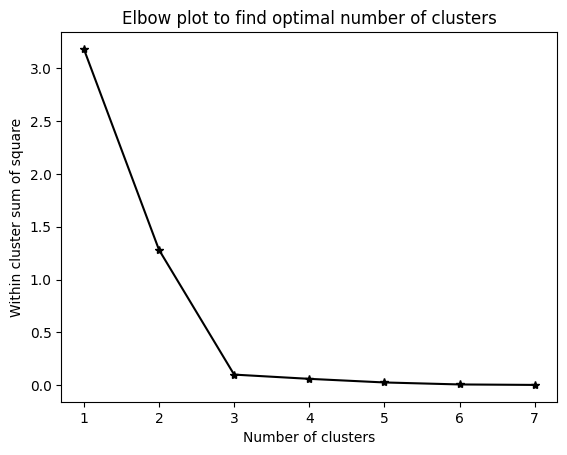

In [12]:
# elbow method to determine number of clusters 
wcss = []
for i in range (1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=5, random_state=0)
    kmeans.fit(X_transformed[:, :2])
    wcss.append(kmeans.inertia_)


plt.figure()
plt.plot(range(1,8), wcss, marker="*", c="black")
plt.title("Elbow plot to find optimal number of clusters")
plt.xlabel("Number of clusters")

plt.ylabel("Within cluster sum of square")
plt.show()

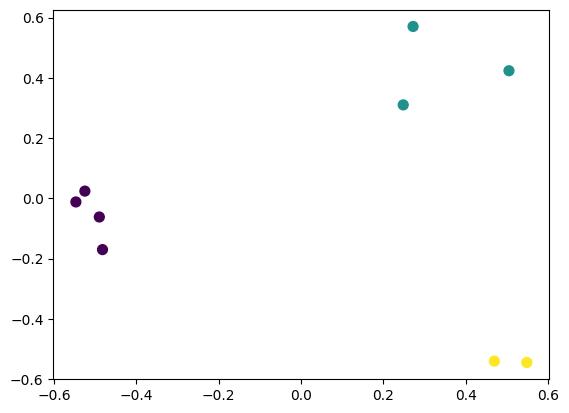

In [13]:
kmeans_final = KMeans(n_clusters=3, init='k-means++', n_init=5, random_state=0)
kmeans_final.fit(X_transformed[:, :2])
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=kmeans_final.labels_, s=50)
plt.show()

In [14]:
df_results = df.copy(deep=True)
df_results['cluster'] = kmeans_final.labels_
df_results

,Medium sand and above %,Fine sand %,Very fine sand %,Coarse silt %,Medium silt %,Fine silt %,Very fine silt %,Clay %,sand_total %,silt_total %,sand/silt,sand/clay,silt/clay,mean,std,median,skewness,kurtosis,cluster
0,30.29,13.25,0.06,14.57,7.22,1.86,5.41,24.75,43.60,29.06,1.500344,1.761616,1.174141,12.17625,10.801225,10.235,0.701053,-0.661566,2
1,9.05,10.94,53.32,3.34,2.24,1.86,1.94,16.68,73.31,9.38,7.815565,4.395084,0.562350,12.42125,17.369627,6.195,2.337610,5.798956,1
2,29.09,9.58,9.54,7.85,7.85,5.70,3.70,19.80,48.21,25.10,1.920717,2.434848,1.267677,11.63875,8.508795,8.695,1.552722,1.827374,2
3,14.65,20.95,36.06,4.90,3.05,2.10,3.40,12.70,71.66,13.45,5.327881,5.642520,1.059055,12.22625,11.762966,8.800,1.325357,1.458380,1
4,6.41,6.00,39.21,3.20,3.00,3.85,3.80,31.45,51.62,13.85,3.727076,1.641335,0.440382,12.11500,14.530418,4.925,1.496321,0.513469,0
5,7.84,6.73,30.58,3.40,4.05,3.45,5.25,35.50,45.15,16.15,2.795666,1.271831,0.454930,12.10000,13.083754,5.990,1.423896,0.193460,0
6,5.73,4.72,41.21,3.45,4.65,5.70,4.35,28.95,51.66,18.15,2.846281,1.784456,0.626943,12.34500,14.428262,5.210,1.644487,1.360539,0
7,7.09,4.32,43.07,2.70,4.30,2.50,4.25,28.95,54.48,13.75,3.962182,1.881865,0.474957,12.14750,15.267409,4.310,1.658475,1.553871,0
8,10.28,12.20,54.33,3.10,4.45,8.00,1.60,2.90,76.81,17.15,4.478717,26.486207,5.913793,12.10750,17.476177,6.225,2.572117,6.890768,1


In [15]:
from scipy import stats
# create dataframe to store stats 
kruskal_results = pd.DataFrame(columns=['variable', 'p_value'])

for n in df.columns:
    arrays = []
    # extract cluster arrays for the selected numerical variable 
    for c in np.unique(kmeans_final.labels_):
        arrays.append(df_results.loc[df_results['cluster']==c][n].values)
    
    # get kruskal stats 
    # let stat = statistics value, p = p_value
    stat, p = stats.kruskal(arrays[0], arrays[1], arrays[2])

    # check p-value
    if p < 0.05:
        print(f'p-value: {p} smaller than 0.05, reject null hypothesis. There is a relationship between {n} and cluster outcome.')
    else:
        print(f'p-value: {p} larger than 0.05, fail to reject null hypothesis.')
    # store results 
    new_row = {'variable': n, 'p_value': p}
    kruskal_results = kruskal_results.append(new_row, ignore_index=True)

kruskal_results = kruskal_results.sort_values(by='p_value').reset_index(drop=True)
kruskal_results


p-value: 0.0301973834223185 smaller than 0.05, reject null hypothesis. There is a relationship between Medium sand and above % and cluster outcome.
p-value: 0.04709654875168931 smaller than 0.05, reject null hypothesis. There is a relationship between Fine sand % and cluster outcome.
p-value: 0.08629358649937056 larger than 0.05, fail to reject null hypothesis.
p-value: 0.11778564327848873 larger than 0.05, fail to reject null hypothesis.
p-value: 0.10481529683762549 larger than 0.05, fail to reject null hypothesis.
p-value: 0.8263986736910552 larger than 0.05, fail to reject null hypothesis.
p-value: 0.06720551273974981 larger than 0.05, fail to reject null hypothesis.
p-value: 0.029322159123893816 smaller than 0.05, reject null hypothesis. There is a relationship between Clay % and cluster outcome.
p-value: 0.04285212686704024 smaller than 0.05, reject null hypothesis. There is a relationship between sand_total % and cluster outcome.
p-value: 0.08629358649937056 larger than 0.05, fai

,variable,p_value
0,Clay %,0.029322
1,Medium sand and above %,0.030197
2,sand/silt,0.030197
3,median,0.039866
4,sand_total %,0.042852
5,Fine sand %,0.047097
6,sand/clay,0.055023
7,Very fine silt %,0.067206
8,silt/clay,0.078954
9,silt_total %,0.086294


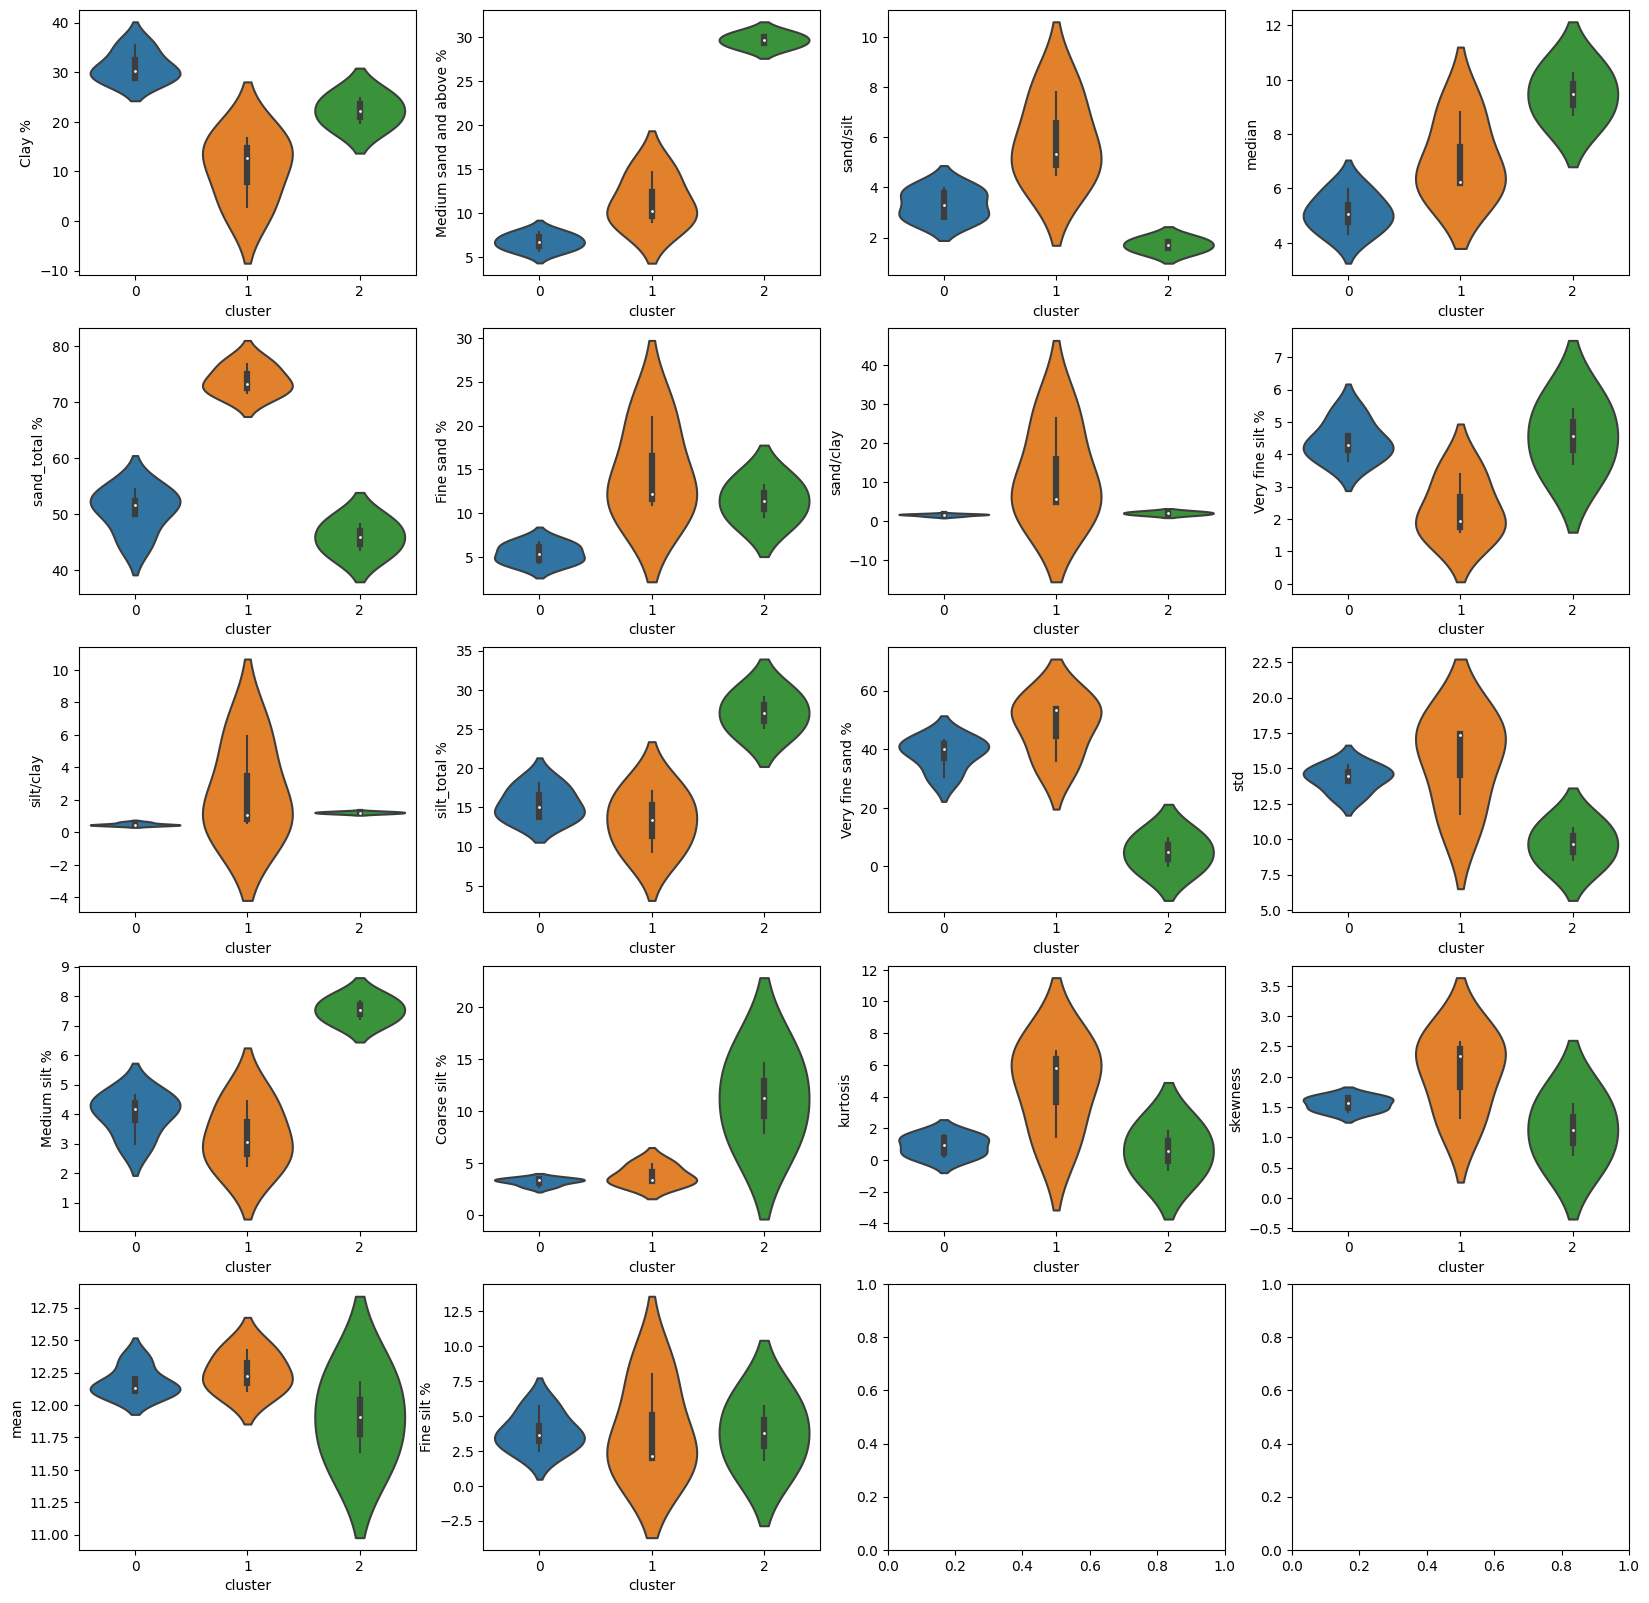

In [18]:
fig, ax = plt.subplots(5, 4, figsize=(20, 20))
ax = ax.flatten()
i = 0
for var in kruskal_results['variable'].values:
    sns.violinplot(data = df_results, x = 'cluster', y = var, scale = 'width', inner="box", ax = ax[i])
    i += 1
plt.show()

scalability - as number of samples increase, this is going to be useful and save time
methodology is reusable
with input from geochem, thin section etc, this can help to identify facies

potential - for predictive model - 

- collect more samples 